In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [2]:
import hdbscan

In [3]:
filename = '/home/garner1/wsi-data/npy/clusterable_embedding.merge.primary.ilastik.npy'
test_data = np.load(filename)

idx = np.random.randint(test_data.shape[0], size=100000)
XX = test_data[:,:3]

In [4]:
XX.shape

(596532, 3)

In [5]:
clusterer = hdbscan.HDBSCAN(min_samples=300, min_cluster_size=5000, gen_min_span_tree=True)
clusterer.fit(XX)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5000, min_samples=300, p=None,
        prediction_data=False)

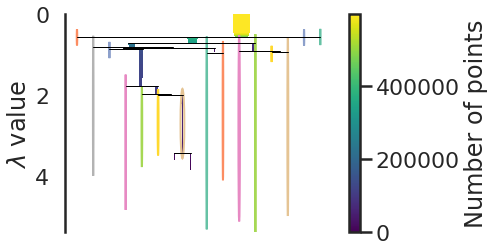

In [6]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette("Set2",len(clusterer.labels_)))

In [7]:
from plotly.graph_objs import *
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

df = pd.DataFrame(data=test_data,columns=['x','y','z','labels'])#.iloc[idx]

df['labels'] = df['labels'].astype(int).apply(str)

df['cluster'] = clusterer.labels_
df['cluster'] = df['cluster'].apply(str)

#df['alpha'] = clusterer.probabilities_
#df['alpha'] = df['alpha'].apply(str)

df_filtered = df[df.cluster != str(-1)]

fig = px.scatter_3d(df_filtered, x="x", y="y", z="z", color="cluster", hover_name="labels", 
                        color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_traces(marker=dict(size=1,opacity=0.75),selector=dict(mode='markers'))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                      legend=go.layout.Legend(
                          x=0,
                          y=1,
                          traceorder='normal',
                          font=dict(family='sans-serif',size=20,color='black'),
                          itemsizing='constant' #to show larget legend markers
                      ))

fig.write_html('adeno.primary.html', auto_open=True)

In [67]:
'''
Evaluate the distribution of sample over the clusters
'''
sample_profiles = []
for sample in set(df['labels']):
    #the first value is for the unassigned points
    sample_profiles.append(df[df.labels == sample]['cluster'].value_counts(normalize=False).sort_index().tolist())
print(len(sample_profiles))

14


In [68]:
profile_df = pd.DataFrame.from_records(sample_profiles).transpose()
labeled_profile_df = profile_df.drop([0]) # remove unlabeled points

In [69]:
labeled_profile_df.shape

(15, 14)

In [70]:
labeled_profile_df.columns = list(set(df['labels']))

In [71]:
labeled_profile_df

,41,52,13,54,40,45,56,57,17,53,51,39,38,46
1,584.0,281.0,844.0,685.0,478.0,418.0,307.0,880.0,309.0,93.0,440.0,76.0,271.0,663.0
2,1489.0,251.0,1661.0,654.0,730.0,515.0,549.0,976.0,303.0,218.0,439.0,23.0,125.0,1345.0
3,2761.0,256.0,803.0,285.0,1910.0,572.0,103.0,348.0,26.0,309.0,1.0,35.0,15.0,119.0
4,1.0,19624.0,140.0,2.0,5.0,364.0,1.0,3.0,7869.0,57.0,93.0,17209.0,48.0,6.0
5,261.0,26.0,11689.0,193.0,85.0,6.0,32.0,2.0,165.0,91.0,36.0,90.0,6842.0,94.0
6,54.0,109.0,1115.0,108.0,6649.0,247.0,2.0,1.0,121.0,187.0,119.0,34.0,383.0,1207.0
7,239.0,11.0,518.0,36.0,1357.0,147.0,78.0,152.0,12401.0,15719.0,14694.0,103.0,86.0,7675.0
8,961.0,248.0,1254.0,482.0,508.0,1086.0,481.0,1691.0,351.0,85.0,36.0,33.0,317.0,660.0
9,304.0,NaN,1028.0,1046.0,335.0,78.0,300.0,2147.0,71.0,292.0,1582.0,2.0,1.0,937.0
10,8.0,NaN,14.0,15.0,677.0,233.0,817.0,13726.0,1.0,1.0,18.0,29.0,660.0,14.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7786d32d0>,
      dtype=object)

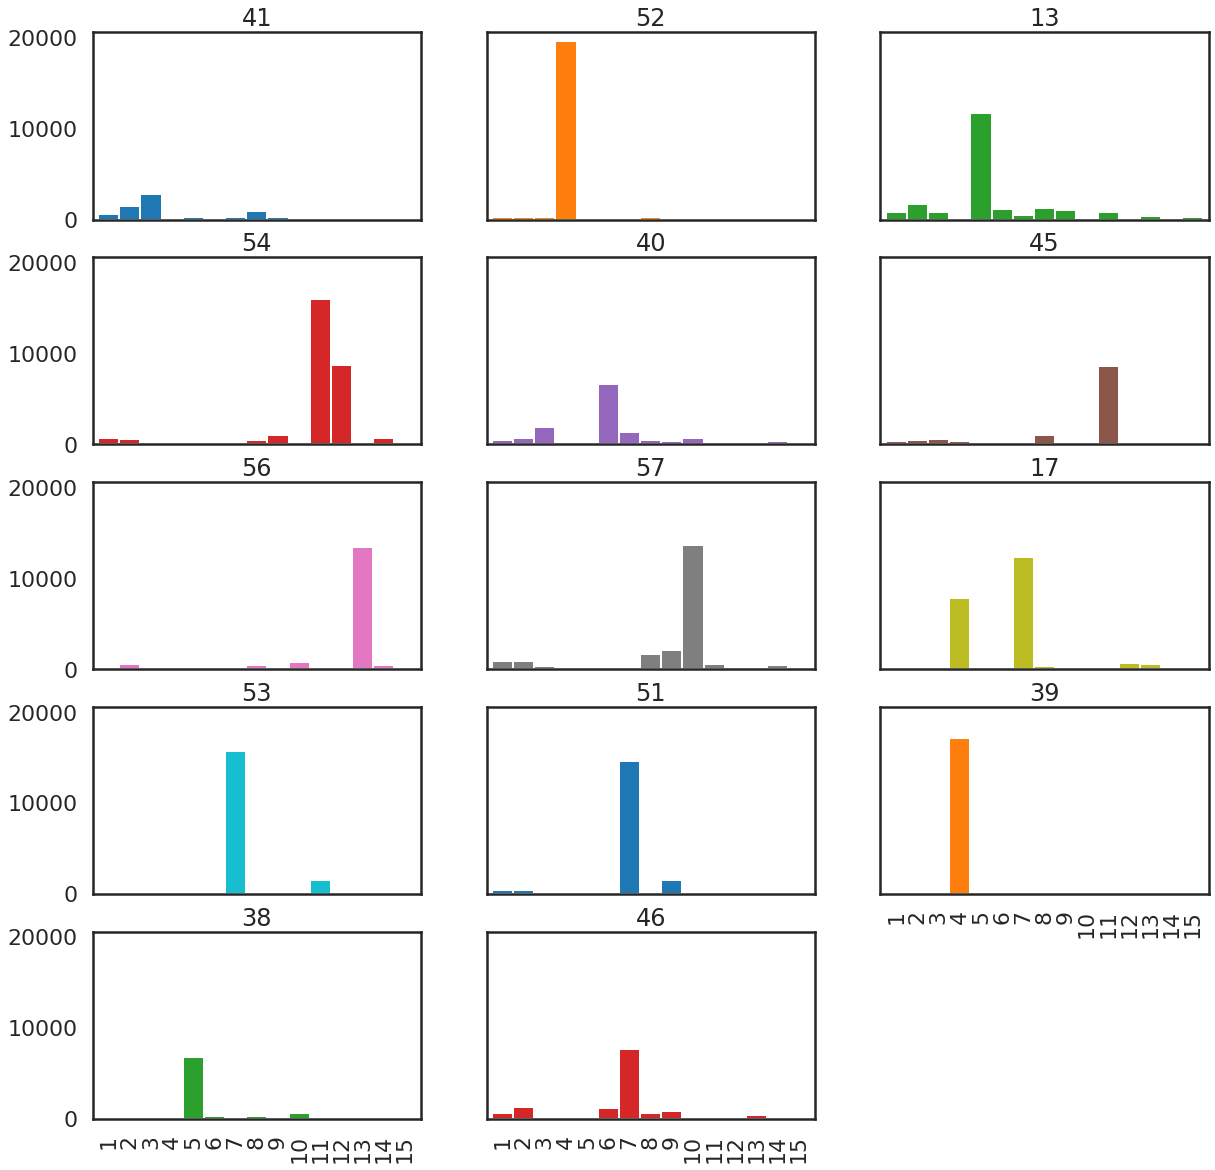

In [74]:
#for sample in set(df['labels']):
labeled_profile_df.plot(figsize=(20,20), subplots=True,kind='bar', width=1.0, legend=False, 
                             layout=(5, 3), sharex=True, sharey=True)
#plt.tight_layout()

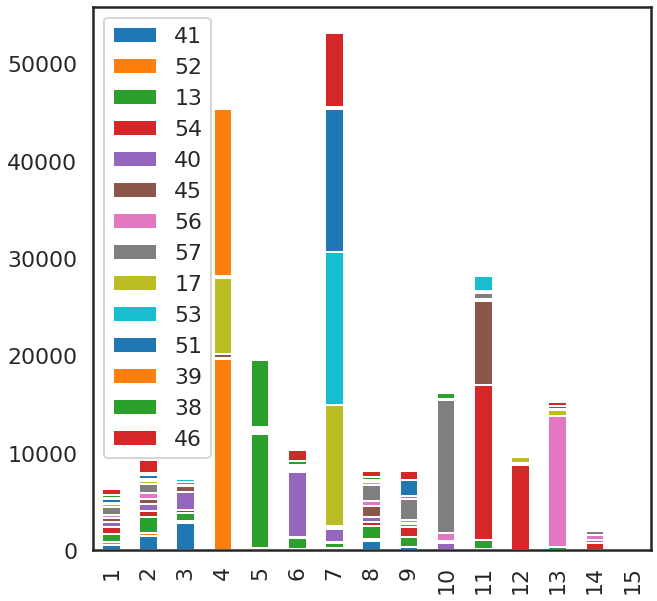

In [75]:
#plt.figure(figsize=(20,20));
labeled_profile_df.plot.bar(stacked=True,figsize=(10,10))